<a href="https://colab.research.google.com/github/ahmadfadhilnugraha/Megaline/blob/main/Sprint_4_Megaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Megaline - Which Prepaid Package is Better?

# Content

* [Introduction](#introduction)
* [Step 1. Data Preparation](#step-1-data-preparation)
    * [Step 1.1. Importing Libraries, Reading, and Checking Data Files](#step-11-importing-libraries-reading-and-checking-data-files)
    * [Step 1.2. Data Exploration](#step-12-data-exploration)
* [Step 2. Data Transformation](#step-2-data-transformation)
    * [Step 2.1. Data Transformation - User Dataset](#step-21-data-transformation---user-dataset)
    * [Step 2.2. Data Transformation - Calls Dataset](#step-22-data-transformation---calls-dataset)
    * [Step 2.3. Data Transformation - Messages Dataset](#step-23-data-transformation---messages-dataset)
    * [Step 2.4. Data Transformation - Internet Dataset](#step-24-data-transformation---internet-dataset)
    * [Step 2.5. Aggregating Data per User](#step-25-aggregating-data-per-user)
        * [Step 2.5.1. Aggregating the data for the number of calls made by each user each month.](#step-251-aggregating-the-data-for-the-number-of-calls-made-by-each-user-each-month)
        * [Step 2.5.2. Aggregating the data for the total minutes spent by each user on calls each month.](#step-252-aggregating-the-data-for-the-total-minutes-spent-by-each-user-on-calls-each-month)
        * [Step 2.5.3. Aggregating the data for the total number of SMS sent by each user each month](#step-253-aggregating-the-data-for-the-total-number-of-sms-sent-by-each-user-each-month)
        * [Step 2.5.4. Aggregating the data for the total internet traffic used by each user each month](#step-254-aggregating-the-data-for-the-total-internet-traffic-used-by-each-user-each-month)
        * [Step 2.5.5. Aggregating all the previously aggregated data based on user_id](#step-255-aggregating-all-the-previously-aggregated-data-based-on-user_id)
* [Step 3. Data Analysis](#step-3-data-analysis)
    * [Step 3.1. Data Analysis - Calls](#step-31-data-analysis---calls)
        * [Step 3.1.1. Comparing the average call duration for each package per month.](#step-311-comparing-the-average-call-duration-for-each-package-per-month)
        * [Step 3.1.2. Comparing the total minutes consumed by users for each package every month](#step-312-comparing-the-total-minutes-consumed-by-users-for-each-package-every-month)
        * [Step 3.1.3. Calculating the average and variance of call durations](#step-313-calculating-the-average-and-variance-of-call-durations)
        * [Step 3.1.4. Data Analysis Summary - Calls](#step-314-data-analysis-summary---calls)
    * [Step 3.2. Data Analysis - Messages](#step-32-data-analysis---messages)
        * [Step 3.2.1. Comparing the total number of messages sent by users each month](#step-321-comparing-the-total-number-of-messages-sent-by-users-each-month)
        * [Step 3.2.2. Comparing the average message sent by users each month](#step-322-comparing-the-average-message-sent-by-users-each-month)
        * [Step 3.2.3. Data Analysis Summary - Messages](#step-323-data-analysis-summary---messages)
    * [Step 3.3. Data Analysis - Internet](#step-33-data-analysis---internet)
        * [Step 3.3.1 Comparing the total internet traffic used by each user each month](#step-331-comparing-the-total-internet-traffic-used-by-each-user-each-month)
        * [Step 3.3.2. Comparing the average internet traffic used by each user each month](#step-332-comparing-the-average-internet-traffic-used-by-each-user-each-month)
        * [Step 3.3.3. Data Analysis Summary - Internet](#step-333-data-analysis-summary---internet)
    * [Step 3.4. Income](#step-34-income)
        * [Step 3.4.1. Comparing the total revenue from each user's package each month](#step-341-comparing-the-total-revenue-from-each-users-package-each-month)
        * [Step 3.4.2. Comparing the average revenue from each user's package each month](#step-342-comparing-the-average-revenue-from-each-users-package-each-month)
* [Step 4. Hypothesis Testing](#step-4-hypothesis-testing)
    * [Step 4.1. Hypothesis I - Revenue from Ultimate and Surf Package is Different](#step-41-hypothesis-i---revenue-from-ultimate-and-surf-package-is-different)
    * [Step 4.2. Hypothesis II - The Average Revenue of Users in the NY-NJ Region is Different](#step-42-hypothesis-ii---the-average-revenue-of-users-in-the-ny-nj-region-is-different)
* [Step 5. Conclusion](#step-5-conclusion)


## Introduction

I work as an analyst at a telecommunications company named Megaline. The company offers its clients two types of prepaid packages, namely the Surf package and the Ultimate package. The advertising department wants to know which prepaid package generates more revenue, so they can create an appropriate advertising budget. You will conduct an initial analysis of these prepaid packages based on a relatively small sample of 500 Megaline clients. The dataset includes information such as who they are, where they come from, which package they use, and the number of calls and messages they sent in the year 2018.

## Goals
This project has two main objectives:
1. Analyzing consumer behavior for each package provided by Megaline.
2. Analyzing which prepaid package generates more revenue.

## Steps

This project will consist of few steps:

1. Import and initial examination of the data.
2. Data transformation to prepare for analysis.
3. Analysis of calls, messages, and internet usage.
4. Comparison of revenue between Surf and Ultimate packages.
5. Hypothesis testing to validate analysis results.
6. Conclusion and recommendations based on findings.

## Description of Data

- Table: users (user data):

  - `user_id`: User ID
  - `first_name`: User's first name
  - `last_name`: User's last name
  - `age`: User's age (years)
  - `reg_date`: Subscription start date (dd, mm, yy)
  - `churn_date`: Date when the user stopped using the service (if the value is missing or absent, it means the service is still in use when this data was created)
  - `city`: User's city of residence
  - `plan`: Phone plan name

- Table: calls (call data):

  - `id`: Unique web session ID
  - `call_date`: Call date
  - `duration`: Call duration (in minutes)
  - `user_id`: User ID making the call

- Table: messages (SMS data):

  - `id`: Unique SMS ID
  - `message_date`: Date the SMS was sent
  - `user_id`: User ID sending the SMS

- Table: internet (web session data):

  - `id`: Unique web session ID
  - `mb_used`: Volume of data consumed during the session (in megabytes)
  - `session_date`: Web session date
  - `user_id`: User ID

- Table: plans (phone plan data):

  - `plan_name`: Phone plan name
  - `usd_monthly_fee`: Monthly fee in US dollars
  - `minutes_included`: Monthly allocated call minutes
  - `messages_included`: Monthly allocated SMS
  - `mb_per_month_included`: Monthly allocated data volume (in megabytes)
  - `usd_per_minute`: Price per minute if exceeding the allocated plan limit (e.g., if the plan has an allocation of 100 minutes, usage starting from the 101st minute will incur a charge)
  - `usd_per_message`: Price per SMS if exceeding the allocated plan limit
  - `usd_per_gb`: Price per extra gigabyte of data if exceeding the allocated plan limit (1 GB = 1024 megabytes)

## Step 1. Data Preparation

### Step 1.1. Importing Libraries, Reading, and Checking Data Files

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_calls = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_4/megaline_calls.csv')
df_internet = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_4/megaline_internet.csv')
df_messages = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_4/megaline_messages.csv')
df_plans = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_4/megaline_plans.csv')
df_users = pd.read_csv('/content/drive/MyDrive/DS/SPRINT_4/megaline_users.csv')

In [9]:
def inspect_dataframe(df):
  print(df.info())
  display(df.head())

### Step 1.2. Data Exploration

In [10]:
dataframes = [
    ("calls", df_calls),
    ("internet", df_internet),
    ("messages", df_messages),
    ("plans", df_plans),
    ("users", df_users)
]

for df_name, df in dataframes:
  print(f"{'-' * 30}\n{df_name}\n{'-' * 30}")
  inspect_dataframe(df)
  print("\n")

------------------------------
calls
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22




------------------------------
internet
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22




------------------------------
messages
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26




------------------------------
plans
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate




------------------------------
users
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


There are some points we need to highlight after checking each dataset.

- User Table Data:
    
    The 'churn_date' column has missing values attributed to users actively using the service during the data creation period. Additionally, there's a need for data type corrections in the 'req_date' and 'churn_date' columns. Furthermore, for improved data analysis, the 'age' and 'city' columns require categorization.

- Calls Table Data:

    While there are no missing entries, the greater record count compared to the User table suggests instances where users did not engage in any calls. Corrections are needed for the data type of the 'call_date' column. Further considerations include rounding the 'duration' column to one minute, and investigating about 20% of entries with zero values to discern whether they signify unanswered calls or missing data.

- Messages Table Data:

    Though there is no missing data, the elevated entry count compared to the User table indicates that some users did not send any messages. Data type corrections are needed for the 'message_date' column.

- Internet Table Data:
    
    Similarly, there are no missing entries, but the increased record count compared to the User table suggests that some users did not access the internet. Corrections are needed for the data type of the 'session_date' column. About 13% of entries with zero values in the 'mb_used' column require investigation to determine whether they result from recording errors or missing data.

- Plans Table Data:

    The data in the Plans table is impeccable, with no missing values, making it a crucial reference point for analyzing user contributions.

To address these anomalies, the subsequent steps involve rectifying missing values and correcting data types. Furthermore, efforts will be made to augment data quality by incorporating additional information.

## Step 2. Data Transformation

### Step 2.1. Data Transformation - User Dataset

In the dataset df_users, there are 2 columns containing dates, but the data types are not appropriate. For the churn_date column, there are missing values, indicating that the users are still using the Megaline service. This data does not need to be deleted. It is also necessary to calculate the duration of how long a user has been using the Megaline service.

In [16]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

inspect_dataframe(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [18]:
# Adding the duration of how long each user has been using the Megaline service.

df_users['users_use_duration'] = df_users['churn_date'] - df_users['reg_date']

inspect_dataframe(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   user_id             500 non-null    int64          
 1   first_name          500 non-null    object         
 2   last_name           500 non-null    object         
 3   age                 500 non-null    int64          
 4   city                500 non-null    object         
 5   reg_date            500 non-null    datetime64[ns] 
 6   plan                500 non-null    object         
 7   churn_date          34 non-null     datetime64[ns] 
 8   users_use_duration  34 non-null     timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), object(4), timedelta64[ns](1)
memory usage: 35.3+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,users_use_duration
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaT


### Step 2.2. Data Transformation - Calls Dataset

The 'call_date' column in the dataset should have a 'datetime' data type instead of 'object.' Calls with a duration of 0 seconds, possibly indicating failed connections, can be removed to streamline the analysis. In addition, a new column also needs to be added to capture the month for each call in the dataset.

In [19]:
df_calls[df_calls['duration']==0].nunique()

id           26834
user_id        478
call_date      348
duration         1
dtype: int64

In [21]:
df_calls = df_calls[df_calls['duration']!=0]

In [22]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [23]:
def month_column(dataset, col_name):
    new_column = dataset[col_name].dt.to_period("M")
    return new_column

In [24]:
df_calls['month'] = month_column(df_calls, 'call_date')

In [25]:
inspect_dataframe(df_calls)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
 4   month      110901 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.1+ MB
None


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


### Step 2.3. Data Transformation - Messages Dataset

For the 'message_date' column, a conversion to datetime format is required, and an additional 'month' column needs to be added to capture the month for each sent message.

In [26]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [27]:
df_messages['month'] = month_column(df_messages, 'message_date')

In [28]:
inspect_dataframe(df_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB
None


,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


### Step 2.4. Data Transformation - Internet Dataset

Some users might have internet usage recorded as 0, potentially indicating an error or no internet access. If these instances are minimal, it's advisable to remove them to avoid analysis inaccuracies. The 'session_date' column should be converted to datetime format, and a new 'month' column needs to be added to capture the month for each user's internet session.

In [29]:
df_internet[df_internet['mb_used']==0].nunique()

id              13747
user_id           477
session_date      339
mb_used             1
dtype: int64

In [31]:
df_internet = df_internet[df_internet['mb_used']!=0]

In [32]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

<ipython-input-32-fac93a98ca6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])


In [33]:
df_internet['month'] = month_column(df_internet, 'session_date')

<ipython-input-33-d3284ea6662f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internet['month'] = month_column(df_internet, 'session_date')


In [34]:
inspect_dataframe(df_internet)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
 4   month         91078 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 4.2+ MB
None


,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12
5,1001_0,1001,2018-08-24,284.68,2018-08


### Step 2.5. Aggregating Data per User

Before we continue to aggregating data, we will start by checking terms and condition of each prepaid plans.

In [35]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Surf Plan:**
- Messages Included: 50
- Data Allowance (MB per month): 15,360
- Minutes Included: 500
- Monthly Fee (USD): 20
- Additional Cost per GB of Data (USD): 10
- Additional Cost per Message (USD): 0.03
- Additional Cost per Minute (USD): 0.03

**Ultimate Plan:**
- Messages Included: 1000
- Data Allowance (MB per month): 30,720
- Minutes Included: 3000
- Monthly Fee (USD): 70
- Additional Cost per GB of Data (USD): 7
- Additional Cost per Message (USD): 0.01
- Additional Cost per Minute (USD): 0.01

These terms and conditions outline the allocated resources and costs associated with the Surf and Ultimate prepaid plans, providing a basis for further analysis of user expenses and usage patterns.

#### Step 2.5.1. Aggregating the data for the number of calls made by each user each month.

In [36]:
df_calls_count_agg = df_calls.pivot_table(index = ['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_calls_count_agg.columns = ['user_id', 'month', 'calls_count']
df_calls_count_agg.head()

,user_id,month,calls_count
0,1000,2018-12,16
1,1001,2018-08,22
2,1001,2018-09,38
3,1001,2018-10,47
4,1001,2018-11,49


#### Step 2.5.2. Aggregating the data for the total minutes spent by each user on calls each month.

If a call is less than 1 minute or 60 seconds, it will be rounded up to 1 minute.

In [37]:
def duration_ceiling(duration):
    if duration < 60:
        return 1
    else:
        return 'NaN'

In [38]:
df_calls['duration_ceiling'] = df_calls['duration'].apply(duration_ceiling)
df_calls_agg = df_calls.pivot_table(index=['user_id', 'month'], values='duration_ceiling', aggfunc='sum').reset_index()
df_calls_agg.head()


,user_id,month,duration_ceiling
0,1000,2018-12,16
1,1001,2018-08,22
2,1001,2018-09,38
3,1001,2018-10,47
4,1001,2018-11,49


#### Step 2.5.3. Aggregating the data for the total number of SMS sent by each user each month

In [39]:
df_messages_agg = df_messages.pivot_table(index = ['user_id', 'month'], values='id', aggfunc='count').reset_index()
df_messages_agg.columns = ['user_id', 'month', 'sms']
df_messages_agg.head()

,user_id,month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


#### Step 2.5.4. Aggregating the data for the total internet traffic used by each user each month

Additionally, representing the usage in gigabytes (GB) and also if the usage is below 1 MB, it will be rounded up to 1 MB.

In [40]:
df_internet_agg = df_internet.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
df_internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [41]:
def data_usage_ceiling(data):
    mb_to_gb = data/1024
    data_ceiling = np.ceil(mb_to_gb)
    return data_ceiling

In [42]:
df_internet_agg['gb_used'] = df_internet_agg['mb_used'].apply(data_usage_ceiling).astype('int')
df_internet_agg.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19


#### Step 2.5.5. Aggregating all the previously aggregated data based on user_id

In [43]:
unique_month = pd.DataFrame(df_internet['month'].unique(), columns=['month']).sort_values('month').reset_index(drop=True)
unique_month['key'] = 1
unique_month

,month,key
0,2018-01,1
1,2018-02,1
2,2018-03,1
3,2018-04,1
4,2018-05,1
5,2018-06,1
6,2018-07,1
7,2018-08,1
8,2018-09,1
9,2018-10,1


In [44]:
unique_user_id = pd.DataFrame(df_users['user_id'].unique(), columns=['user_id']).sort_values('user_id').reset_index(drop=True)
unique_user_id['key'] = 1
unique_user_id

,user_id,key
0,1000,1
1,1001,1
2,1002,1
3,1003,1
4,1004,1
...,...,...
495,1495,1
496,1496,1
497,1497,1
498,1498,1


In [45]:
user_id_and_month = unique_user_id.merge(unique_month, on='key', how='inner')
user_id_and_month

,user_id,key,month
0,1000,1,2018-01
1,1000,1,2018-02
2,1000,1,2018-03
3,1000,1,2018-04
4,1000,1,2018-05
...,...,...,...
5995,1499,1,2018-08
5996,1499,1,2018-09
5997,1499,1,2018-10
5998,1499,1,2018-11


In [46]:
df_merge = user_id_and_month.merge(df_users, on='user_id', how='left')
df_merge = df_merge.merge(df_internet_agg, on=['user_id', 'month'], how='left')
df_merge = df_merge.merge(df_calls_agg, on=['user_id', 'month'], how='left')
df_merge = df_merge.merge(df_messages_agg, on=['user_id', 'month'], how='left')
df_merge = df_merge.merge(df_calls_count_agg, on=['user_id', 'month'], how='left')

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   user_id             6000 non-null   int64          
 1   key                 6000 non-null   int64          
 2   month               6000 non-null   period[M]      
 3   first_name          6000 non-null   object         
 4   last_name           6000 non-null   object         
 5   age                 6000 non-null   int64          
 6   city                6000 non-null   object         
 7   reg_date            6000 non-null   datetime64[ns] 
 8   plan                6000 non-null   object         
 9   churn_date          408 non-null    datetime64[ns] 
 10  users_use_duration  408 non-null    timedelta64[ns]
 11  mb_used             2277 non-null   float64        
 12  gb_used             2277 non-null   float64        
 13  duration_ceiling    2256 non-null

In [47]:
df_merge = df_merge.merge(df_plans, left_on='plan', right_on='plan_name', how='left')
inspect_dataframe(df_merge)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   user_id                6000 non-null   int64          
 1   key                    6000 non-null   int64          
 2   month                  6000 non-null   period[M]      
 3   first_name             6000 non-null   object         
 4   last_name              6000 non-null   object         
 5   age                    6000 non-null   int64          
 6   city                   6000 non-null   object         
 7   reg_date               6000 non-null   datetime64[ns] 
 8   plan                   6000 non-null   object         
 9   churn_date             408 non-null    datetime64[ns] 
 10  users_use_duration     408 non-null    timedelta64[ns]
 11  mb_used                2277 non-null   float64        
 12  gb_used                2277 non-null   float64  

,user_id,key,month,first_name,last_name,age,city,reg_date,plan,churn_date,...,sms,calls_count,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,1,2018-01,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,NaN,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1000,1,2018-02,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,NaN,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1000,1,2018-03,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,NaN,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1000,1,2018-04,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,NaN,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1000,1,2018-05,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,NaN,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate


The task involves determining the monthly revenue for each user, considering the base cost of their chosen package and any additional charges incurred for exceeding package limits. If there are null values indicating no usage of certain services, they are treated as 0 in the calculation.

In [48]:
def extra_price (value, max_value, cost_extra):
    extra_value = value - max_value
    if extra_value > 0:
        return cost_extra * extra_value
    else:
        return 0

In [49]:
df_merge['mb_used'] = df_merge['mb_used'].fillna(0)
df_merge['gb_used'] = df_merge['gb_used'].fillna(0)
df_merge['duration_ceiling'] = df_merge['duration_ceiling'].fillna(0)
df_merge['sms'] = df_merge['sms'].fillna(0)
df_merge['calls_count'] = df_merge['calls_count'].fillna(0)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   user_id                6000 non-null   int64          
 1   key                    6000 non-null   int64          
 2   month                  6000 non-null   period[M]      
 3   first_name             6000 non-null   object         
 4   last_name              6000 non-null   object         
 5   age                    6000 non-null   int64          
 6   city                   6000 non-null   object         
 7   reg_date               6000 non-null   datetime64[ns] 
 8   plan                   6000 non-null   object         
 9   churn_date             408 non-null    datetime64[ns] 
 10  users_use_duration     408 non-null    timedelta64[ns]
 11  mb_used                6000 non-null   float64        
 12  gb_used                6000 non-null   float64  

In [50]:
df_merge['gb_per_month_included'] = df_merge['mb_per_month_included'] / 1024
df_merge['gb_per_month_included'] = df_merge['gb_per_month_included'].astype('int')
df_merge.head()

,user_id,key,month,first_name,last_name,age,city,reg_date,plan,churn_date,...,calls_count,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,1,2018-01,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30
1,1000,1,2018-02,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30
2,1000,1,2018-03,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30
3,1000,1,2018-04,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30
4,1000,1,2018-05,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,0.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30


In [51]:
df_merge['extra_internet'] = df_merge.apply(lambda row: extra_price(value=row['gb_used'],
                                                                  max_value=row['gb_per_month_included'],
                                                                  cost_extra=row['usd_per_gb']), axis=1)

In [52]:
df_merge['extra_messages'] = df_merge.apply(lambda row: extra_price(value=row['sms'],
                                                                  max_value=row['messages_included'],
                                                                  cost_extra=row['usd_per_message']), axis=1)

In [53]:
df_merge['extra_minutes'] = df_merge.apply(lambda row: extra_price(value=row['duration_ceiling'],
                                                                  max_value=row['minutes_included'],
                                                                  cost_extra=row['usd_per_minute']), axis=1)

In [55]:
df_merge['revenue'] = df_merge['usd_monthly_pay'] + df_merge['extra_internet'] + df_merge['extra_messages'] + df_merge['extra_minutes']

In [56]:
inspect_dataframe(df_merge)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   user_id                6000 non-null   int64          
 1   key                    6000 non-null   int64          
 2   month                  6000 non-null   period[M]      
 3   first_name             6000 non-null   object         
 4   last_name              6000 non-null   object         
 5   age                    6000 non-null   int64          
 6   city                   6000 non-null   object         
 7   reg_date               6000 non-null   datetime64[ns] 
 8   plan                   6000 non-null   object         
 9   churn_date             408 non-null    datetime64[ns] 
 10  users_use_duration     408 non-null    timedelta64[ns]
 11  mb_used                6000 non-null   float64        
 12  gb_used                6000 non-null   float64  

,user_id,key,month,first_name,last_name,age,city,reg_date,plan,churn_date,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,extra_internet,extra_messages,extra_minutes,revenue
0,1000,1,2018-01,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30,0.0,0.0,0,70.0
1,1000,1,2018-02,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30,0.0,0.0,0,70.0
2,1000,1,2018-03,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30,0.0,0.0,0,70.0
3,1000,1,2018-04,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30,0.0,0.0,0,70.0
4,1000,1,2018-05,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,...,70,7,0.01,0.01,ultimate,30,0.0,0.0,0,70.0


## Step 3. Data Analysis

This section aims to compare the profitability of different prepaid packages using the aggregated and merged dataset. The analysis will include statistical calculations and graphical representations to provide a comprehensive understanding of each prepaid package. The initial step involves segregating the merged dataset according to the prepaid packages for further analysis.

In [57]:
df_surf = df_merge[df_merge['plan_name'] == 'surf']
df_ultimate = df_merge[df_merge['plan_name'] == 'ultimate']

### Step 3.1. Data Analysis - Calls

#### Step 3.1.1. Comparing the average call duration for each package per month.

In [58]:
surf_calls_wo_null = df_surf[df_surf['duration_ceiling'] != 0]
surf_calls_ave_grouped = surf_calls_wo_null.pivot_table(index = 'month',
                                    values = ['duration_ceiling'],
                                    aggfunc = (np.mean)).reset_index()
surf_calls_ave_grouped

,month,duration_ceiling
0,2018-01,24.000000
1,2018-02,33.111111
2,2018-03,37.869565
3,2018-04,39.700000
4,2018-05,45.920000
5,2018-06,48.697917
6,2018-07,51.458333
7,2018-08,47.044025
8,2018-09,47.486911
9,2018-10,49.839827


In [59]:
ultimate_calls_wo_null = df_ultimate[df_ultimate['duration_ceiling'] != 0]
ultimate_calls_ave_grouped = ultimate_calls_wo_null.pivot_table(index = 'month',
                                    values = ['duration_ceiling'],
                                    aggfunc = (np.mean)).reset_index()
ultimate_calls_ave_grouped

,month,duration_ceiling
0,2018-01,21.250000
1,2018-02,55.166667
2,2018-03,36.583333
3,2018-04,39.047619
4,2018-05,45.965517
5,2018-06,44.022222
6,2018-07,47.355932
7,2018-08,48.000000
8,2018-09,48.930233
9,2018-10,51.504762


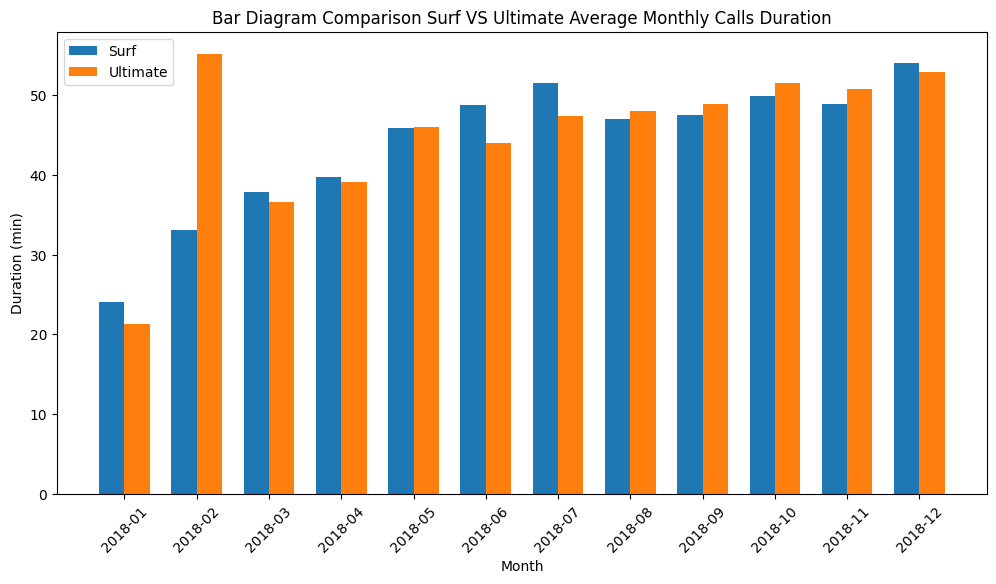

In [60]:
bar_width = 0.35
month_str = [str(month) for month in surf_calls_ave_grouped['month']]
bar_surf = np.arange(len(month_str))
bar_ultimate = bar_surf + bar_width

plt.figure(figsize=(12, 6))
plt.bar(bar_surf, surf_calls_ave_grouped['duration_ceiling'], width=bar_width, label='Surf')
plt.bar(bar_ultimate, ultimate_calls_ave_grouped['duration_ceiling'], width=bar_width, label='Ultimate')

plt.title('Bar Diagram Comparison Surf VS Ultimate Average Monthly Calls Duration')
plt.xlabel('Month')
plt.ylabel('Duration (min)')
plt.xticks(bar_surf + bar_width/2, month_str)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### Step 3.1.2. Comparing the total minutes consumed by users for each package every month

In [61]:
surf_calls_sum_grouped = surf_calls_wo_null.pivot_table(index = 'month',
                                    values = ['duration_ceiling'],
                                    aggfunc = (sum)).reset_index()
surf_calls_sum_grouped

,month,duration_ceiling
0,2018-01,48.0
1,2018-02,298.0
2,2018-03,871.0
3,2018-04,1985.0
4,2018-05,3444.0
5,2018-06,4675.0
6,2018-07,6175.0
7,2018-08,7480.0
8,2018-09,9070.0
9,2018-10,11513.0


In [62]:
ultimate_calls_sum_grouped = ultimate_calls_wo_null.pivot_table(index = 'month',
                                    values = ['duration_ceiling'],
                                    aggfunc = (sum)).reset_index()
ultimate_calls_sum_grouped

,month,duration_ceiling
0,2018-01,85.0
1,2018-02,331.0
2,2018-03,439.0
3,2018-04,820.0
4,2018-05,1333.0
5,2018-06,1981.0
6,2018-07,2794.0
7,2018-08,3408.0
8,2018-09,4208.0
9,2018-10,5408.0


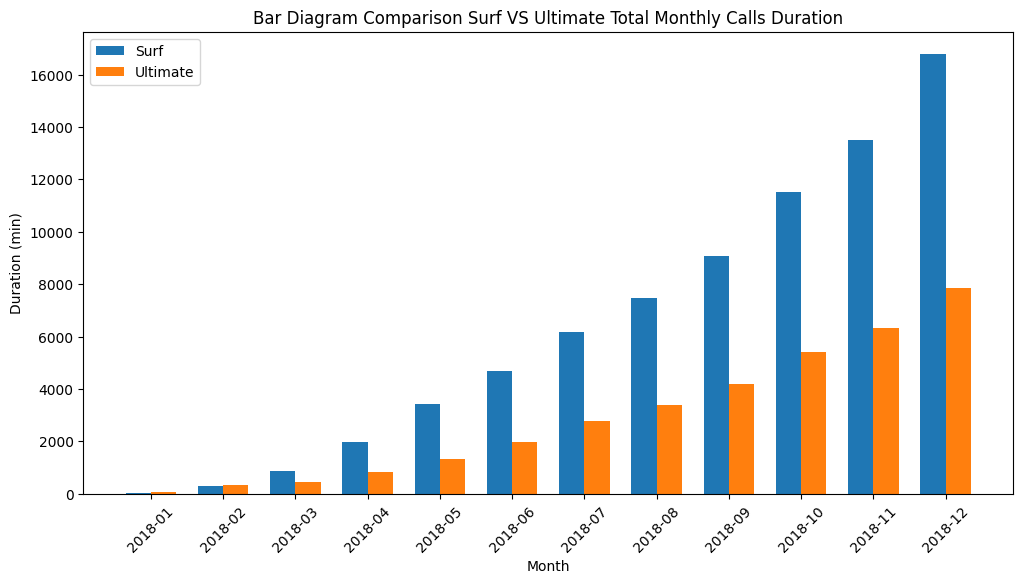

In [63]:
bar_width = 0.35
month_str_sum = [str(month) for month in surf_calls_sum_grouped['month']]
bar_surf_sum = np.arange(len(month_str_sum))
bar_ultimate_sum = bar_surf_sum + bar_width

plt.figure(figsize=(12, 6))
plt.bar(bar_surf_sum, surf_calls_sum_grouped['duration_ceiling'], width=bar_width, label='Surf')
plt.bar(bar_ultimate_sum, ultimate_calls_sum_grouped['duration_ceiling'], width=bar_width, label='Ultimate')

plt.title('Bar Diagram Comparison Surf VS Ultimate Total Monthly Calls Duration')
plt.xlabel('Month')
plt.ylabel('Duration (min)')
plt.xticks(bar_surf_sum + bar_width/2, month_str_sum)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### Step 3.1.3. Calculating the average and variance of call durations

In [70]:
surf_calls_var_grouped = surf_calls_wo_null.pivot_table(index = 'month',
                                    values = ['duration_ceiling'],
                                    aggfunc = (np.var)).reset_index()
surf_calls_ave_grouped

,month,duration_ceiling
0,2018-01,24.000000
1,2018-02,33.111111
2,2018-03,37.869565
3,2018-04,39.700000
4,2018-05,45.920000
5,2018-06,48.697917
6,2018-07,51.458333
7,2018-08,47.044025
8,2018-09,47.486911
9,2018-10,49.839827


In [65]:
ultimate_calls_var_grouped = ultimate_calls_wo_null.pivot_table(index = 'month',
                                    values = ['duration_ceiling'],
                                    aggfunc = (np.var)).reset_index()
ultimate_calls_var_grouped

,month,duration_ceiling
0,2018-01,211.583333
1,2018-02,713.366667
2,2018-03,976.083333
3,2018-04,479.547619
4,2018-05,566.391626
5,2018-06,461.113131
6,2018-07,921.991818
7,2018-08,680.342857
8,2018-09,657.665663
9,2018-10,680.002381


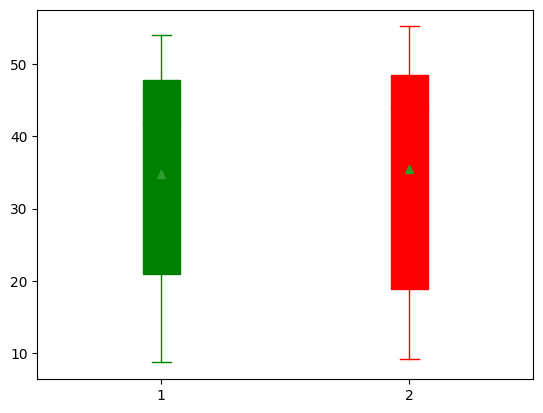

In [66]:
def color_boxplot(data, color, pos=[0], ax=None):
    ax = ax or plt.gca()
    bp = ax.boxplot(data, patch_artist=True,  showmeans=True, positions=pos)
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[item], color=color)


data1 = surf_calls_ave_grouped.describe()
data2 = ultimate_calls_ave_grouped.describe()
fig, ax = plt.subplots()
bp1 = color_boxplot(data1, 'green', [1])
bp2 = color_boxplot(data2, 'red', [2])
ax.autoscale()
ax.set(xticks=[1,2], xticklabels=[1,2])
plt.show()

#### Step 3.1.4. Data Analysis Summary - Calls

Analysis of average call durations per month reveals an overall upward trend in both Surf and Ultimate packages throughout 2018. However, in specific months (January, March, April, June, July, and December), Surf users exhibit higher average call durations. The highest average call durations for Surf users are observed in December, while Ultimate users peak in February.

Furthermore, when evaluating the total call durations per month, both packages show an increasing trend throughout the year. Notably, Surf package users consistently make more calls each month compared to Ultimate package users.

### Step 3.2. Data Analysis - Messages

#### Step 3.2.1 Comparing the total number of messages sent by users each month

In [67]:
surf_messages_wo_null = df_surf[df_surf['sms'] != 0]
surf_messages_sum_grouped = surf_messages_wo_null.pivot_table(index = 'month',
                                    values = ['sms'],
                                    aggfunc = (sum)).reset_index()
surf_messages_sum_grouped

,month,sms
0,2018-01,21.0
1,2018-02,108.0
2,2018-03,351.0
3,2018-04,870.0
4,2018-05,1849.0
5,2018-06,2454.0
6,2018-07,3271.0
7,2018-08,4662.0
8,2018-09,5968.0
9,2018-10,8020.0


In [68]:
ultimate_messages_wo_null = df_ultimate[df_ultimate['sms'] != 0]
ultimate_messages_sum_grouped = ultimate_messages_wo_null.pivot_table(index = 'month',
                                    values = ['sms'],
                                    aggfunc = (sum)).reset_index()
ultimate_messages_sum_grouped

,month,sms
0,2018-01,62.0
1,2018-02,151.0
2,2018-03,243.0
3,2018-04,463.0
4,2018-05,931.0
5,2018-06,1379.0
6,2018-07,1937.0
7,2018-08,2732.0
8,2018-09,3259.0
9,2018-10,4181.0


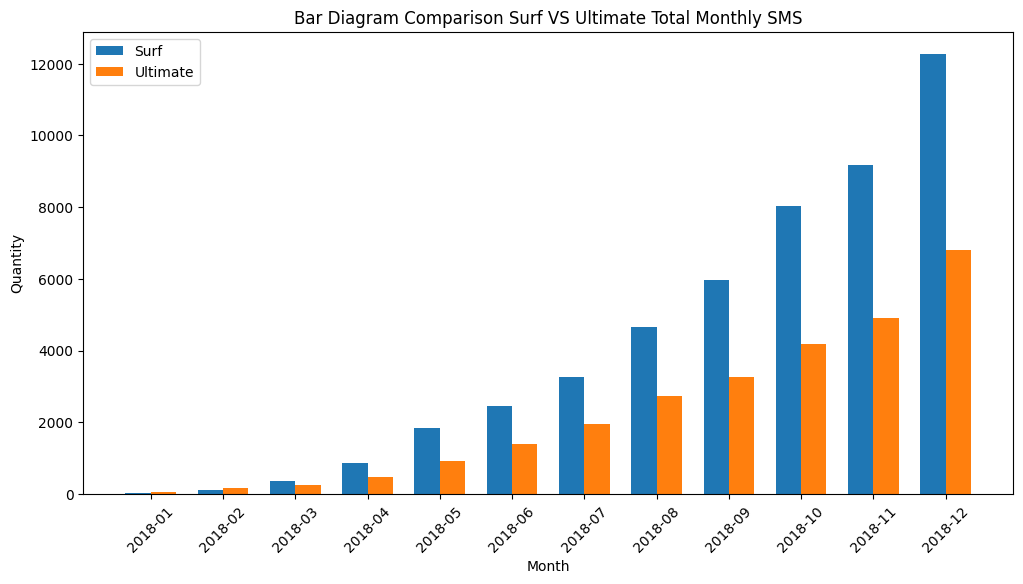

In [69]:
bar_width = 0.35
month_str_sum = [str(month) for month in surf_messages_sum_grouped['month']]
bar_surf_sum = np.arange(len(month_str_sum))
bar_ultimate_sum = bar_surf_sum + bar_width

plt.figure(figsize=(12, 6))
plt.bar(bar_surf_sum, surf_messages_sum_grouped['sms'], width=bar_width, label='Surf')
plt.bar(bar_ultimate_sum, ultimate_messages_sum_grouped['sms'], width=bar_width, label='Ultimate')

plt.title('Bar Diagram Comparison Surf VS Ultimate Total Monthly SMS')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(bar_surf_sum + bar_width/2, month_str_sum)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### Step 3.2.2. Comparing the average message sent by users each month

In [71]:
surf_messages_ave_grouped = surf_messages_wo_null.pivot_table(index = 'month',
                                    values = ['sms'],
                                    aggfunc = (np.mean)).reset_index()
surf_messages_ave_grouped

,month,sms
0,2018-01,21.000000
1,2018-02,21.600000
2,2018-03,21.937500
3,2018-04,24.166667
4,2018-05,33.017857
5,2018-06,33.616438
6,2018-07,35.945055
7,2018-08,37.596774
8,2018-09,39.523179
9,2018-10,42.433862


In [72]:
ultimate_messages_ave_grouped = ultimate_messages_wo_null.pivot_table(index = 'month',
                                    values = ['sms'],
                                    aggfunc = (np.mean)).reset_index()
ultimate_messages_ave_grouped

,month,sms
0,2018-01,20.666667
1,2018-02,25.166667
2,2018-03,34.714286
3,2018-04,28.937500
4,2018-05,44.333333
5,2018-06,36.289474
6,2018-07,41.212766
7,2018-08,47.929825
8,2018-09,45.901408
9,2018-10,46.977528


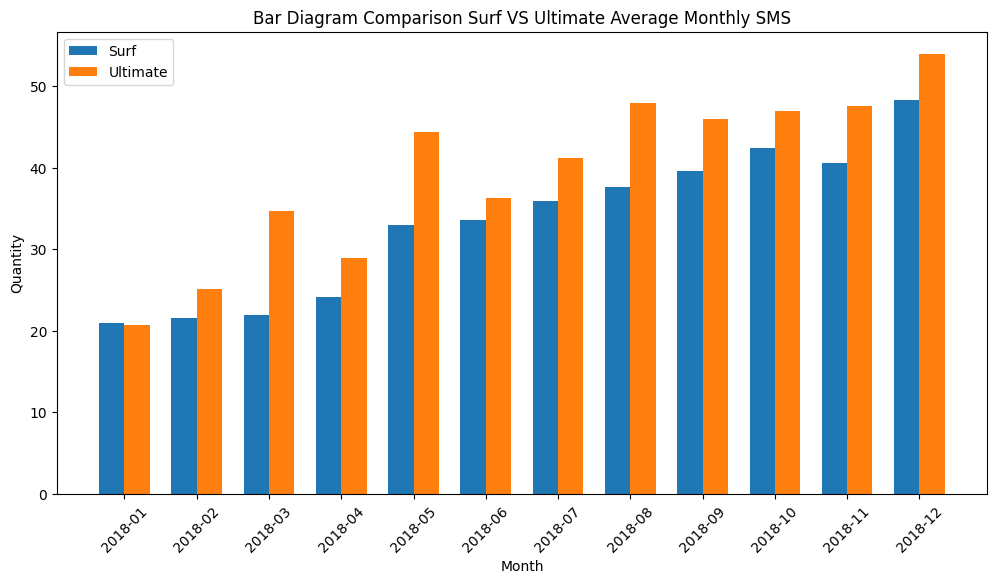

In [73]:
bar_width = 0.35
month_str_ave = [str(month) for month in surf_messages_ave_grouped['month']]
bar_surf_ave = np.arange(len(month_str_ave))
bar_ultimate_ave = bar_surf_ave + bar_width

plt.figure(figsize=(12, 6))
plt.bar(bar_surf_ave, surf_messages_ave_grouped['sms'], width=bar_width, label='Surf')
plt.bar(bar_ultimate_ave, ultimate_messages_ave_grouped['sms'], width=bar_width, label='Ultimate')

plt.title('Bar Diagram Comparison Surf VS Ultimate Average Monthly SMS')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(bar_surf_ave + bar_width/2, month_str_ave)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### Step 3.2.3. Data Analysis Summary - Messages

Throughout 2018, both Surf and Ultimate package users showed a rising trend in sending messages. The total number of messages sent by Surf package users exceeded that of Ultimate package users. However, when considering the average, Ultimate package users had a higher average per user. This suggests that although more Surf users engaged in messaging, Ultimate users sent a greater number of messages per user.

### Step 3.3. Data Analysis - Internet

#### Step 3.3.1 Comparing the total internet traffic used by each user each month

In [74]:
surf_internet_wo_null = df_surf[df_surf['gb_used'] != 0]
surf_internet_sum_grouped = surf_internet_wo_null.pivot_table(index = 'month',
                                    values = ['gb_used'],
                                    aggfunc = (sum)).reset_index()
surf_internet_sum_grouped

,month,gb_used
0,2018-01,10.0
1,2018-02,110.0
2,2018-03,312.0
3,2018-04,611.0
4,2018-05,1087.0
5,2018-06,1502.0
6,2018-07,2042.0
7,2018-08,2735.0
8,2018-09,3238.0
9,2018-10,4126.0


In [75]:
ultimate_internet_wo_null = df_ultimate[df_ultimate['gb_used'] != 0]
ultimate_internet_sum_grouped = ultimate_internet_wo_null.pivot_table(index = 'month',
                                    values = ['gb_used'],
                                    aggfunc = (sum)).reset_index()
ultimate_internet_sum_grouped

,month,gb_used
0,2018-01,29.0
1,2018-02,121.0
2,2018-03,221.0
3,2018-04,343.0
4,2018-05,489.0
5,2018-06,725.0
6,2018-07,973.0
7,2018-08,1267.0
8,2018-09,1463.0
9,2018-10,1878.0


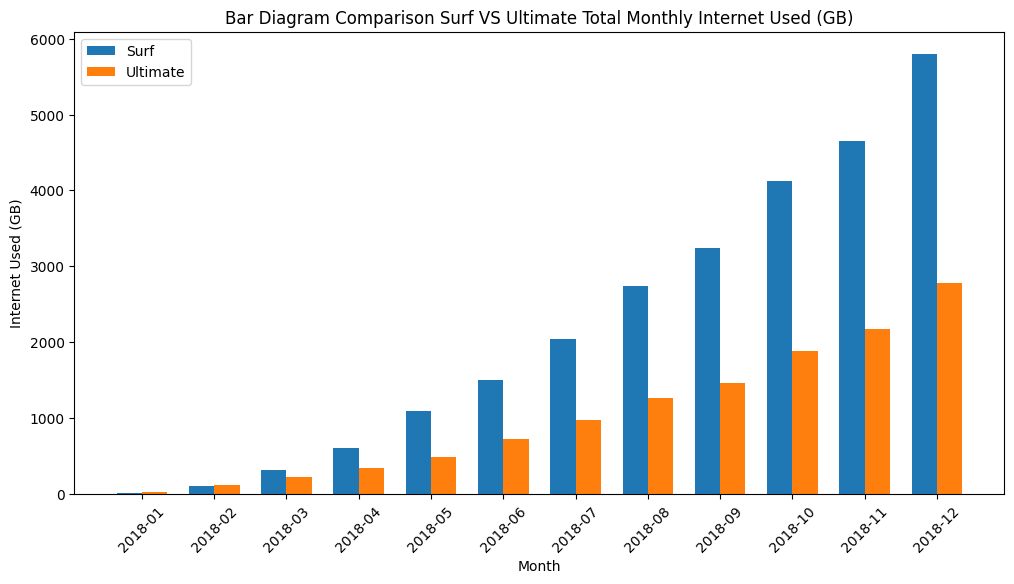

In [76]:
bar_width = 0.35
month_str_sum = [str(month) for month in surf_internet_sum_grouped['month']]
bar_surf_sum = np.arange(len(month_str_sum))
bar_ultimate_sum = bar_surf_sum + bar_width

plt.figure(figsize=(12, 6))
plt.bar(bar_surf_sum, surf_internet_sum_grouped['gb_used'], width=bar_width, label='Surf')
plt.bar(bar_ultimate_sum, ultimate_internet_sum_grouped['gb_used'], width=bar_width, label='Ultimate')

plt.title('Bar Diagram Comparison Surf VS Ultimate Total Monthly Internet Used (GB)')
plt.xlabel('Month')
plt.ylabel('Internet Used (GB)')
plt.xticks(bar_surf_sum + bar_width/2, month_str_sum)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### Step 3.3.2. Comparing the average internet traffic used by each user each month

In [77]:
surf_internet_ave_grouped = surf_internet_wo_null.pivot_table(index = 'month',
                                    values = ['gb_used'],
                                    aggfunc = (np.mean)).reset_index()
surf_internet_ave_grouped

,month,gb_used
0,2018-01,5.000000
1,2018-02,12.222222
2,2018-03,13.565217
3,2018-04,12.469388
4,2018-05,14.302632
5,2018-06,15.810526
6,2018-07,17.016667
7,2018-08,17.201258
8,2018-09,16.777202
9,2018-10,17.632479


In [78]:
ultimate_internet_ave_grouped = ultimate_internet_wo_null.pivot_table(index = 'month',
                                    values = ['gb_used'],
                                    aggfunc = (np.mean)).reset_index()
ultimate_internet_ave_grouped

,month,gb_used
0,2018-01,7.250000
1,2018-02,17.285714
2,2018-03,18.416667
3,2018-04,16.333333
4,2018-05,16.862069
5,2018-06,15.425532
6,2018-07,16.491525
7,2018-08,17.845070
8,2018-09,17.011628
9,2018-10,17.885714


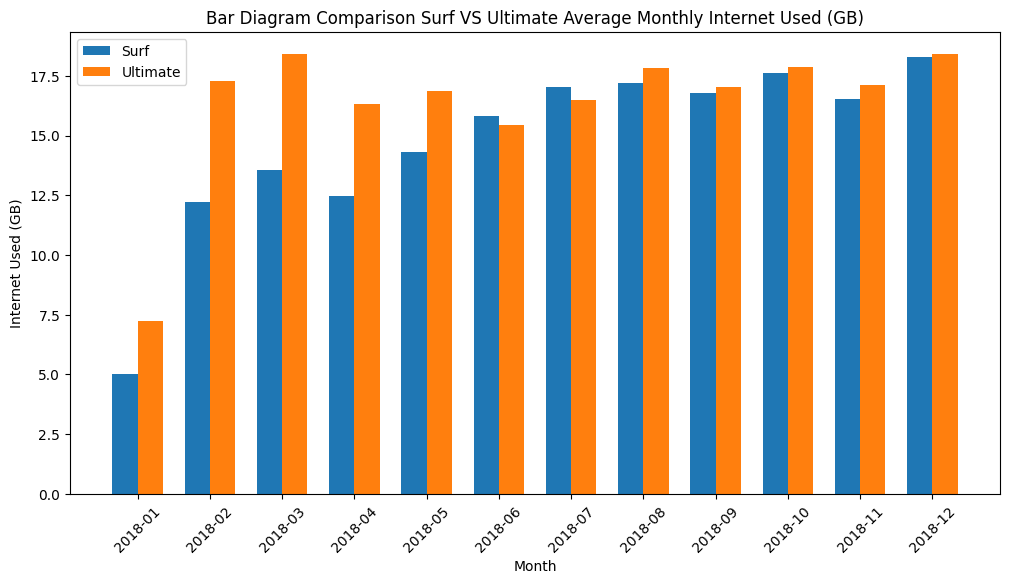

In [79]:
bar_width = 0.35
month_str_ave = [str(month) for month in surf_internet_ave_grouped['month']]
bar_surf_ave = np.arange(len(month_str_ave))
bar_ultimate_ave = bar_surf_ave + bar_width

plt.figure(figsize=(12, 6))
plt.bar(bar_surf_ave, surf_internet_ave_grouped['gb_used'], width=bar_width, label='Surf')
plt.bar(bar_ultimate_ave, ultimate_internet_ave_grouped['gb_used'], width=bar_width, label='Ultimate')

plt.title('Bar Diagram Comparison Surf VS Ultimate Average Monthly Internet Used (GB)')
plt.xlabel('Month')
plt.ylabel('Internet Used (GB)')
plt.xticks(bar_surf_sum + bar_width/2, month_str_ave)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### Step 3.3.3. Data Analysis Summary - Internet

In 2018, both Surf and Ultimate package users experienced an increase in internet traffic. The total data usage by Surf package users exceeded that of Ultimate package users. However, when analyzing the average data usage, the trend reversed, indicating that although more Surf users engaged in internet usage, Ultimate users had a higher average internet consumption per user.

### Step 3.4. Income

#### Step 3.4.1. Comparing the total revenue from each user's package each month

In [80]:
surf_revenue_wo_null = df_surf[df_surf['revenue'] != 0]
surf_revenue_sum_grouped = surf_revenue_wo_null.pivot_table(index = 'month',
                                    values = ['revenue'],
                                    aggfunc = (sum)).reset_index()
surf_revenue_sum_grouped

,month,revenue
0,2018-01,6780.00
1,2018-02,6900.24
2,2018-03,7360.39
3,2018-04,7762.61
4,2018-05,8779.66
5,2018-06,9464.49
6,2018-07,11677.58
7,2018-08,13629.19
8,2018-09,13926.09
9,2018-10,17119.58


In [81]:
ultimate_revenue_wo_null = df_ultimate[df_ultimate['revenue'] != 0]
ultimate_revenue_sum_grouped = ultimate_revenue_wo_null.pivot_table(index = 'month',
                                    values = ['revenue'],
                                    aggfunc = (sum)).reset_index()
ultimate_revenue_sum_grouped

,month,revenue
0,2018-01,11270.0
1,2018-02,11270.0
2,2018-03,11326.0
3,2018-04,11333.0
4,2018-05,11291.0
5,2018-06,11347.0
6,2018-07,11382.0
7,2018-08,11473.0
8,2018-09,11445.0
9,2018-10,11515.0


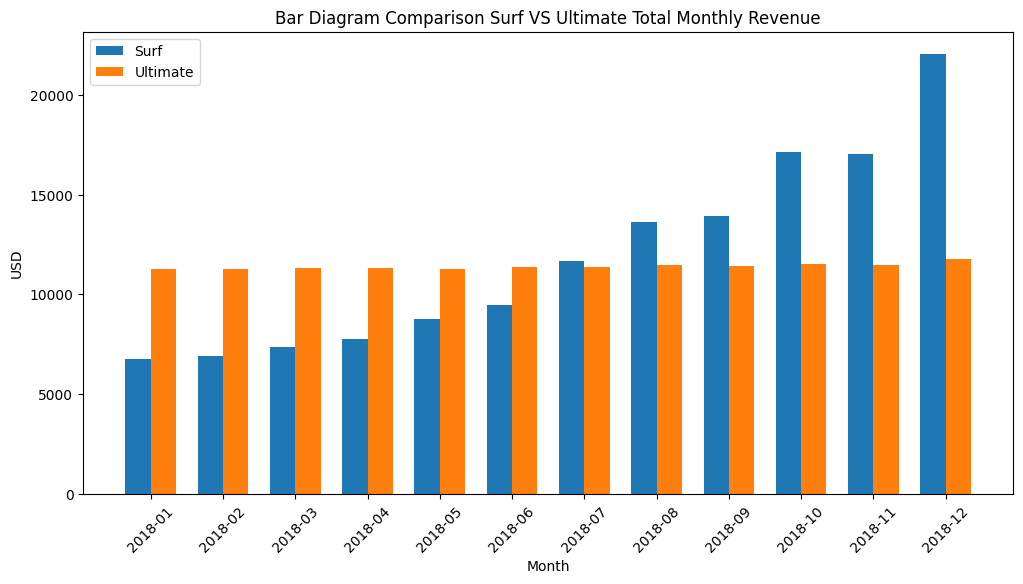

In [82]:
bar_width = 0.35
month_str_sum = [str(month) for month in surf_revenue_sum_grouped['month']]
bar_surf_sum = np.arange(len(month_str_sum))
bar_ultimate_sum = bar_surf_sum + bar_width

plt.figure(figsize=(12, 6))
plt.bar(bar_surf_sum, surf_revenue_sum_grouped['revenue'], width=bar_width, label='Surf')
plt.bar(bar_ultimate_sum, ultimate_revenue_sum_grouped['revenue'], width=bar_width, label='Ultimate')

plt.title('Bar Diagram Comparison Surf VS Ultimate Total Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('USD')
plt.xticks(bar_surf_sum + bar_width/2, month_str_sum)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

#### Step 3.4.2. Comparing the average revenue from each user's package each month

In [83]:
surf_revenue_ave_grouped = surf_revenue_wo_null.pivot_table(index = 'month',
                                    values = ['revenue'],
                                    aggfunc = (np.mean)).reset_index()
surf_revenue_ave_grouped

,month,revenue
0,2018-01,20.000000
1,2018-02,20.354690
2,2018-03,21.712065
3,2018-04,22.898555
4,2018-05,25.898702
5,2018-06,27.918850
6,2018-07,34.447139
7,2018-08,40.204100
8,2018-09,41.079912
9,2018-10,50.500236


In [84]:
ultimate_revenue_ave_grouped = ultimate_revenue_wo_null.pivot_table(index = 'month',
                                    values = ['revenue'],
                                    aggfunc = (np.mean)).reset_index()
ultimate_revenue_ave_grouped

,month,revenue
0,2018-01,70.000000
1,2018-02,70.000000
2,2018-03,70.347826
3,2018-04,70.391304
4,2018-05,70.130435
5,2018-06,70.478261
6,2018-07,70.695652
7,2018-08,71.260870
8,2018-09,71.086957
9,2018-10,71.521739


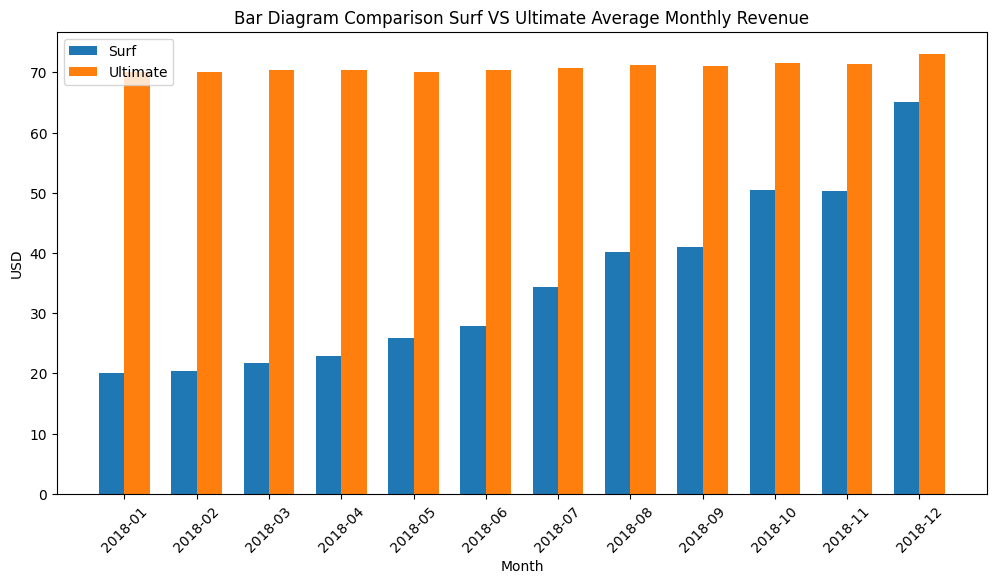

In [85]:
bar_width = 0.35
month_str_ave = [str(month) for month in surf_revenue_ave_grouped['month']]
bar_surf_ave = np.arange(len(month_str_ave))
bar_ultimate_ave = bar_surf_ave + bar_width

plt.figure(figsize=(12, 6))
plt.bar(bar_surf_ave, surf_revenue_ave_grouped['revenue'], width=bar_width, label='Surf')
plt.bar(bar_ultimate_ave, ultimate_revenue_ave_grouped['revenue'], width=bar_width, label='Ultimate')

plt.title('Bar Diagram Comparison Surf VS Ultimate Average Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('USD')
plt.xticks(bar_surf_sum + bar_width/2, month_str_ave)
plt.xticks(rotation=45)
plt.legend(loc='upper left')

plt.show()

The analysis indicates that Surf package users consistently contribute to increasing revenue each month throughout 2018. In contrast, Ultimate package users maintain a constant monthly revenue. Although the average revenue from Ultimate package users is higher, the total revenue shows fluctuations. From January to June, Ultimate package users contribute more, but from July to December, Surf package users generate higher revenue.

## Step 4. Hypothesis Testing

### Step 4.1. Hypothesis I - Revenue from Ultimate and Surf Package is Different

The null hypothesis (H0) typically states that something being tested is equal, so the values are:

**H0:** *The average revenue from Ultimate and Surf package users is the same.*

**H1:** *The average revenue from Ultimate and Surf package users is not the same.*

The hypothesis testing criterion used is a two-sample mean test because the samples come from two different populations.

The significance level (alpha) used is 0.05.

In [86]:
rev_user = pd.pivot_table(
    data = df_merge,
    index = 'user_id',
    columns = 'month',
    values='revenue',
    aggfunc='sum'
)
rev_user

month,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
user_id,,,,,,,,,,,,
1000,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.0,70.0
1001,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,90.09,60.0,60.0
1002,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,60.0,20.0
1003,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.00,20.0,140.0
1004,20.0,20.0,20.0,20.0,20.0,80.0,110.0,150.0,60.0,20.00,90.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,100.0,140.00,120.0,110.0
1496,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,40.0,20.00,20.0,40.0
1497,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.00,70.0,70.0


In [87]:
rev_total = pd.pivot_table(
    data = df_merge,
    index = ['user_id', 'plan'],
    values='revenue',
    aggfunc='sum'
).sort_values(by='revenue', ascending=False)

rev_total.head()

,,revenue
user_id,plan,
1268,surf,1860.0
1292,surf,1700.0
1240,surf,1640.0
1359,surf,1620.0
1147,surf,1610.0


In [88]:
rev_total = rev_total.reset_index()

In [89]:
rev_surf = rev_total.loc[rev_total['plan'] == 'surf']
rev_ultimate = rev_total.loc[rev_total['plan'] == 'ultimate']

rev_surf

,user_id,plan,revenue
0,1268,surf,1860.0
1,1292,surf,1700.0
2,1240,surf,1640.0
3,1359,surf,1620.0
4,1147,surf,1610.0
...,...,...,...
495,1093,surf,240.0
496,1034,surf,240.0
497,1429,surf,240.0
498,1285,surf,240.0


In [90]:
rev_ultimate

,user_id,plan,revenue
6,1028,ultimate,1379.0
9,1490,ultimate,1106.0
12,1144,ultimate,1064.0
14,1038,ultimate,994.0
17,1043,ultimate,938.0
...,...,...,...
177,1113,ultimate,840.0
178,1025,ultimate,840.0
179,1063,ultimate,840.0
180,1135,ultimate,840.0


In [91]:
surf_var = np.var(rev_surf['revenue'])
ultimate_var = np.var(rev_ultimate['revenue'])


print(surf_var)
print(ultimate_var)

63343.89395160327
2750.1398865784495


In [92]:
alpha = 0.05

result = st.ttest_ind(rev_surf['revenue'], rev_ultimate['revenue'], equal_var = False)

print('p-value:', result.pvalue)

if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: 3.137837742392988e-104
We reject the null hypothesis


The computed p-value from the t-test is extremely close to zero, significantly below the specified 0.05 significance level. Consequently, we have sufficient evidence to reject the null hypothesis. This rejection implies that the average monthly revenue derived from clients subscribing to the Surf and Ultimate plans is not equal. Although this outcome doesn't conclusively affirm a difference in average revenue for users of each plan, the very small p-value strongly suggests a high likelihood of differentiation between the two values. The statistical significance of the p-value underscores the implausibility of the equality of average revenues between Surf and Ultimate plan users.

### Step 4.2. Hypothesis II - The Average Revenue of Users in the NY-NJ Region is Different

The null hypothesis (H0) generally states that something being tested is equal, so the values are:

**H0:** *The average revenue of users in the NY-NJ region is the same as the average revenue of users from other regions.*

**H1:** *The average revenue of users in the NY-NJ region is different from the average revenue of users from other regions.*

The hypothesis testing criterion used is a two-sample mean test because the samples come from two different populations.

The significance level (alpha) used is 0.05.

In [93]:
df_city = df_users.drop(
    ['first_name', 'last_name', 'age', 'reg_date', 'churn_date', 'users_use_duration'],
    axis=1)

df_city

,user_id,city,plan
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf
3,1003,"Tulsa, OK MSA",surf
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf
496,1496,"New Orleans-Metairie, LA MSA",surf
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf


In [94]:
df_city['city_clean'] = df_city['city'].str.split(',').str[1]
df_city['city_clean'] = df_city['city_clean'].str.replace(' MSA', '')
df_city['ny_nj'] = df_city['city_clean'].str.contains('NY-NJ', regex=True)
df_city

,user_id,city,plan,city_clean,ny_nj
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,GA,False
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,WA,False
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf,NV,False
3,1003,"Tulsa, OK MSA",surf,OK,False
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf,WA,False
...,...,...,...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NY-NJ-PA,True
496,1496,"New Orleans-Metairie, LA MSA",surf,LA,False
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,CA,False
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,NY-NJ-PA,True


In [95]:
df_city_new = rev_total.merge(df_city, on=['user_id', 'plan'], how='left')
df_city_new

,user_id,plan,revenue,city,city_clean,ny_nj
0,1268,surf,1860.0,"Fresno, CA MSA",CA,False
1,1292,surf,1700.0,"Dallas-Fort Worth-Arlington, TX MSA",TX,False
2,1240,surf,1640.0,"Baton Rouge, LA MSA",LA,False
3,1359,surf,1620.0,"Colorado Springs, CO MSA",CO,False
4,1147,surf,1610.0,"Urban Honolulu, HI MSA",HI,False
...,...,...,...,...,...,...
495,1093,surf,240.0,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",TN,False
496,1034,surf,240.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
497,1429,surf,240.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
498,1285,surf,240.0,"Los Angeles-Long Beach-Anaheim, CA MSA",CA,False


In [96]:
df_nynj = df_city_new.loc[df_city_new['ny_nj'] == True]
df_not_nynj = df_city_new.loc[df_city_new['ny_nj'] == False]

df_nynj

,user_id,plan,revenue,city,city_clean,ny_nj
10,1251,surf,1080.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
11,1418,surf,1080.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
12,1144,ultimate,1064.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
17,1043,ultimate,938.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
27,1498,surf,870.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
...,...,...,...,...,...,...
484,1024,surf,240.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
492,1245,surf,240.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
494,1266,surf,240.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True
496,1034,surf,240.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ-PA,True


In [97]:
df_not_nynj

,user_id,plan,revenue,city,city_clean,ny_nj
0,1268,surf,1860.0,"Fresno, CA MSA",CA,False
1,1292,surf,1700.0,"Dallas-Fort Worth-Arlington, TX MSA",TX,False
2,1240,surf,1640.0,"Baton Rouge, LA MSA",LA,False
3,1359,surf,1620.0,"Colorado Springs, CO MSA",CO,False
4,1147,surf,1610.0,"Urban Honolulu, HI MSA",HI,False
...,...,...,...,...,...,...
491,1378,surf,240.0,"Denver-Aurora-Lakewood, CO MSA",CO,False
493,1259,surf,240.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",PA-NJ-DE-MD,False
495,1093,surf,240.0,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",TN,False
498,1285,surf,240.0,"Los Angeles-Long Beach-Anaheim, CA MSA",CA,False


In [98]:
nynj_var = np.var(df_nynj['revenue'])
not_nynj_var = np.var(df_not_nynj['revenue'])

print(nynj_var)
print(not_nynj_var)

69669.03190193749
86798.24554887244


In [100]:
alpha = 0.05

result = st.ttest_ind(df_nynj['revenue'], df_not_nynj['revenue'], equal_var = False)

print('p-value:', result.pvalue)

if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: 0.3205528506530735
We cannot reject the null hypothesis


The calculated p-value, approximately 0.32, exceeds the designated statistical significance level (alpha) of 0.05. Consequently, we must refrain from rejecting the null hypothesis. This indicates a high probability that the average monthly revenue from clients in the NY-NJ area is indeed equal to the average monthly revenue collected from clients in other regions, making it inappropriate to reject the null hypothesis. Therefore, we cannot dismiss the possibility that the average monthly revenue values are equal. This outcome substantiates the notion that the sample of clients from the NY-NJ area does not exhibit any significant differences from the sample of clients in other regions. As a result, there's no need to treat clients from the NY-NJ area differently, obviating the necessity for a separate analysis on that client subgroup.

## Step 5. Conclusion

Through careful observation, it becomes evident that our data hypothesis holds true, revealing disparities in revenue between the Surf and Ultimate plans, as well as variations in earnings between users from the NY-NJ region and those from other areas.

A comprehensive visualization of the data indicates a consistent month-to-month increase in Surf plan users. This leads us to conclude that the Surf plan, with its cost-effective structure, resonates well with user preferences in both the NY-NJ region and other locales.

When assessing revenue, factoring in additional charges for exceeding Surf plan limits does indeed result in higher overall earnings across regions. However, a closer look at the total revenue from the Ultimate plan highlights its ability to generate superior profits.

In summary, a strategic decision for advertising budget allocation would favor the Ultimate plan, given its capacity to yield higher revenue compared to the Surf plan.